# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [1]:
#install spacy in the current conda environment
%pip install spacy


Note: you may need to restart the kernel to use updated packages.


In [2]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------- ------------------------------ 3.1/12.8 MB 18.5 MB/s eta 0:00:01
     ---------------------- ----------------- 7.1/12.8 MB 18.2 MB/s eta 0:00:01
     -------------------------------- ------ 10.7/12.8 MB 17.7 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 17.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [5]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [6]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \r\nMatter \r\nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [7]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [8]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [9]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [10]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [11]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [12]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [13]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

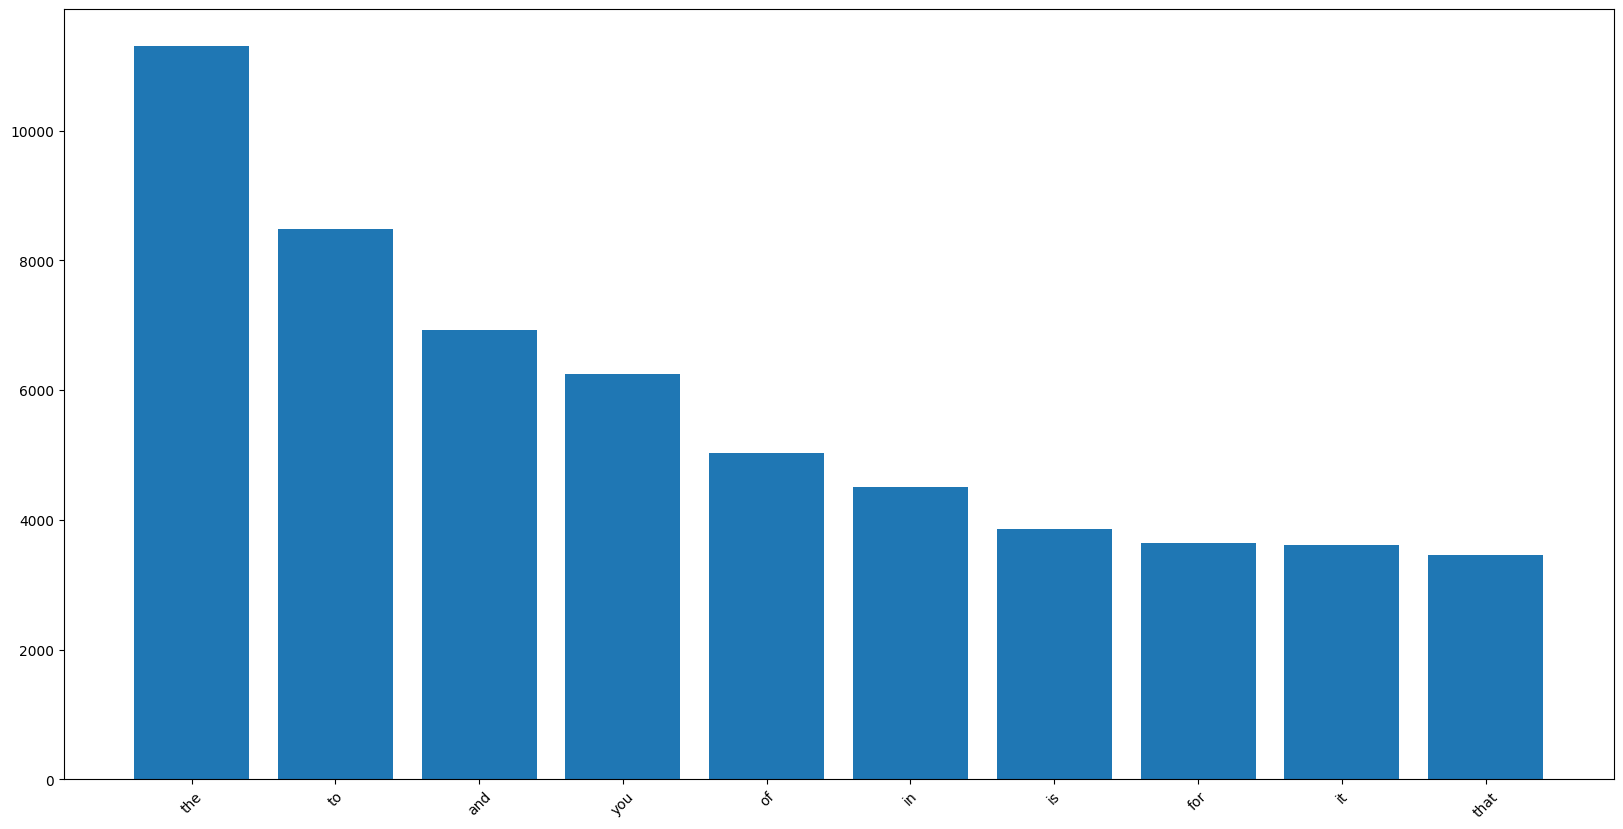

In [15]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: This graph represents the most frequent words in the dataset; but many are general stop words such as "the," "to," "and," and "you." Such words are so frequent in ordinary discourse that they reveal little about the particular community under examination. Though the visualization may initially appear to be engaging, it is actually not all that useful to discern the distinct traits of the community. To obtain meaningful information, preprocessing of the data needs to be done by removing these stop words so that we can focus on the words which are actually important. For instance, in a gaming community, terms such as "game," "strategy," or "win" would tell us much more than more general terms such as "the" or "and." As it is, then, while this graph is a useful initial guide for locating areas for improvement, it does not show any useful information about the community as yet.

#### Lemmatization and stopword removal

In [16]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [17]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [18]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [19]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8608 sparse matrix of type '<class 'numpy.int64'>'
	with 126768 stored elements in Compressed Sparse Row format>

In [20]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not              2863
student          1183
like             1183
people           1124
class             988
                 ... 
club campus         3
open not            3
open source         3
club activity       3
luck search         3
Length: 8608, dtype: int64

In [21]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

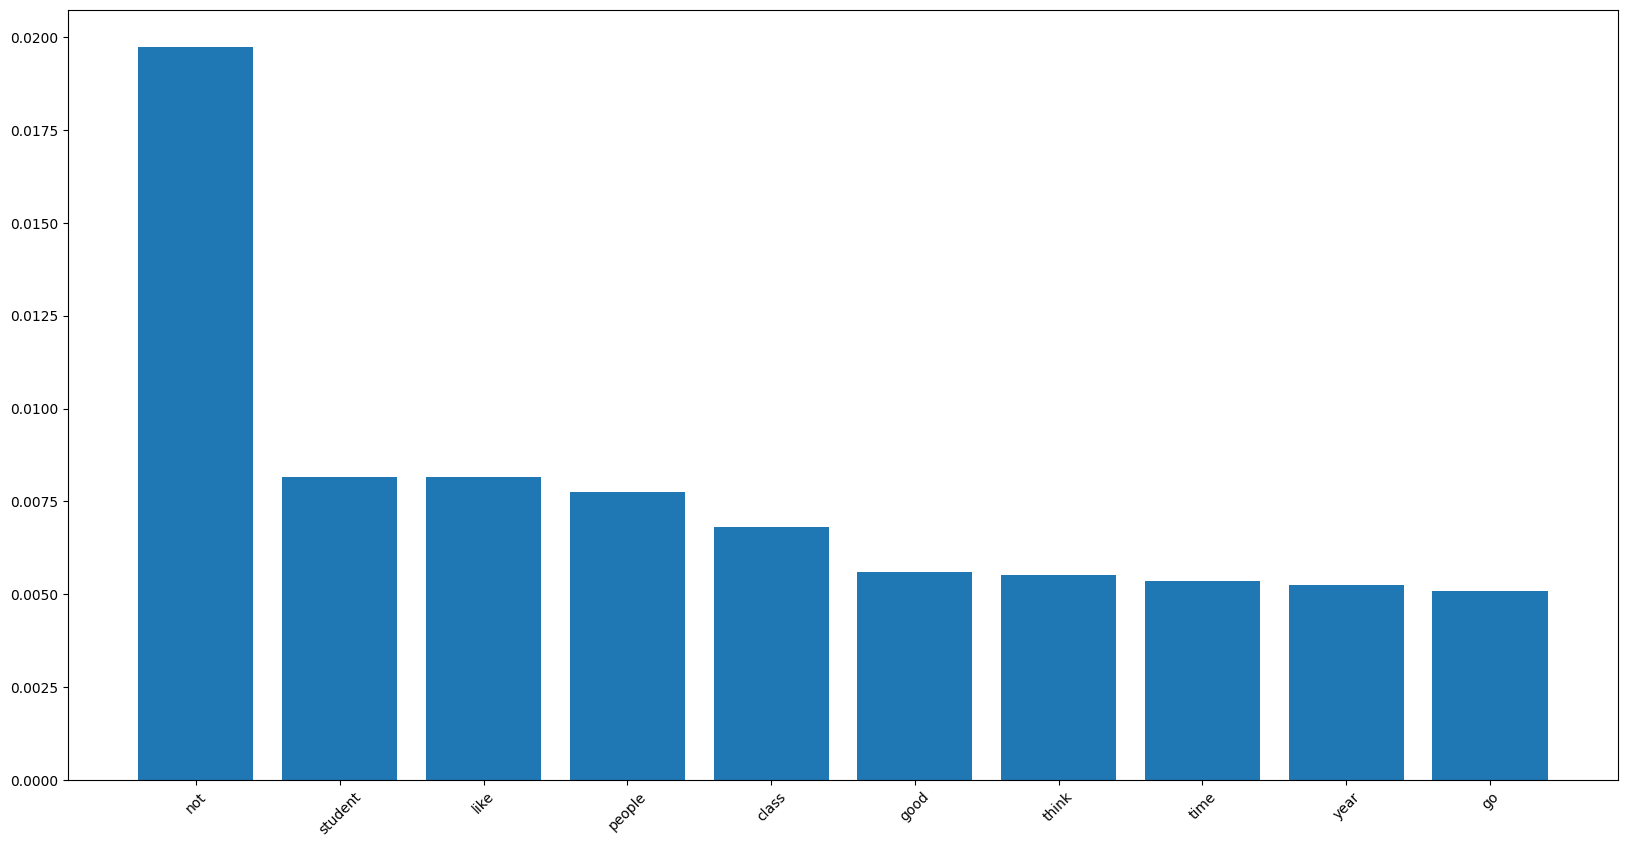

In [22]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [23]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.1400153180566765e-05

In [24]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000035
cs                  0.001228
computer            0.000262
dtype: float64

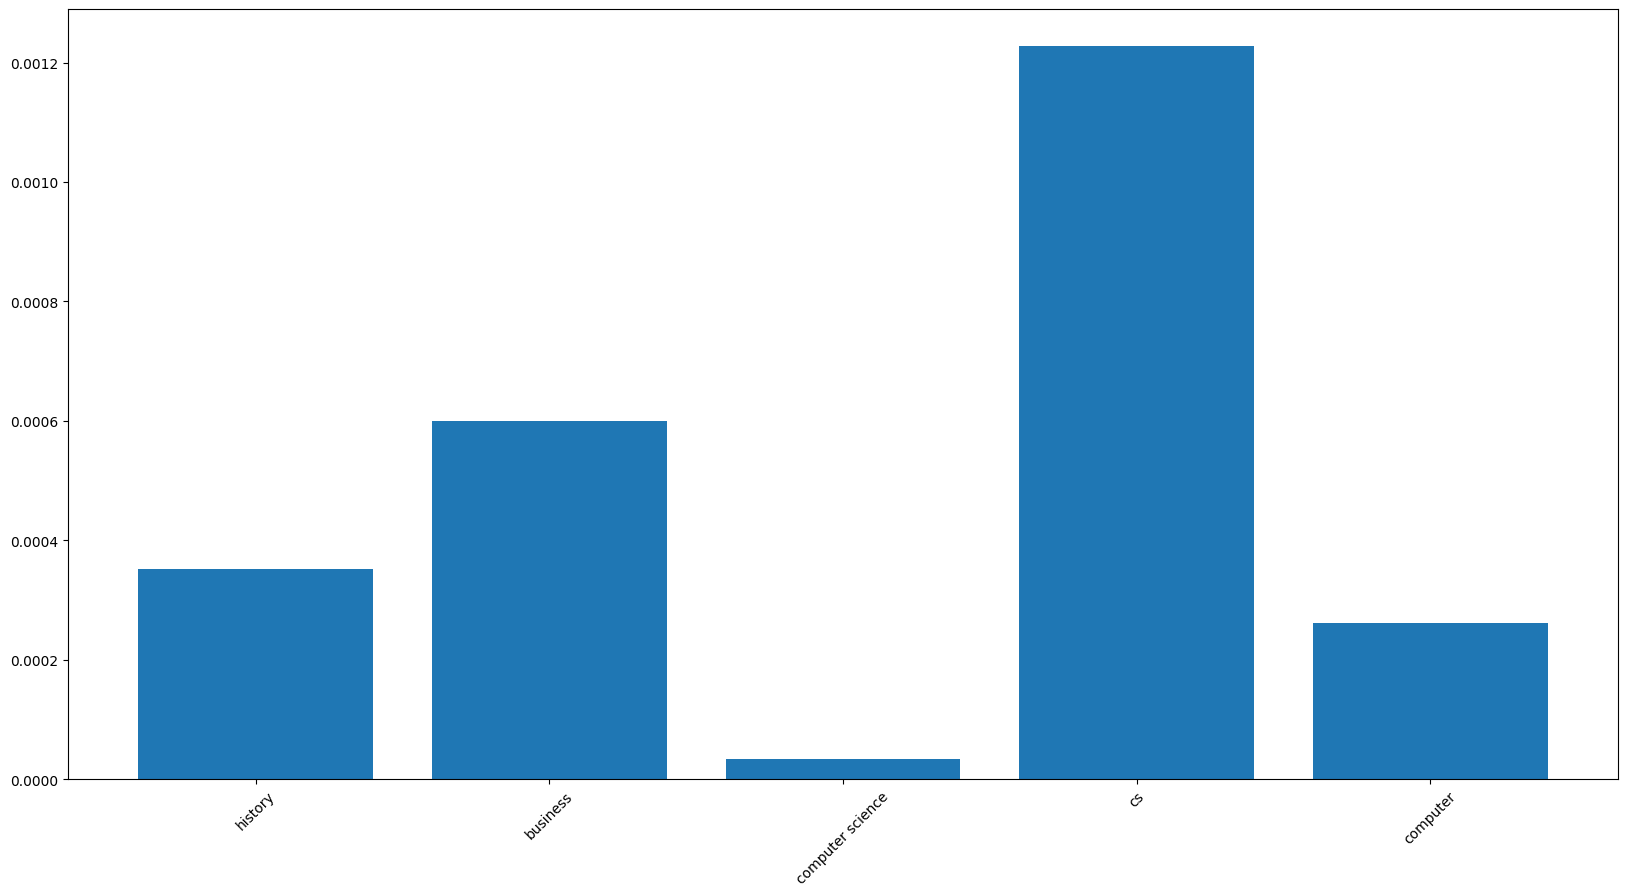

In [25]:
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

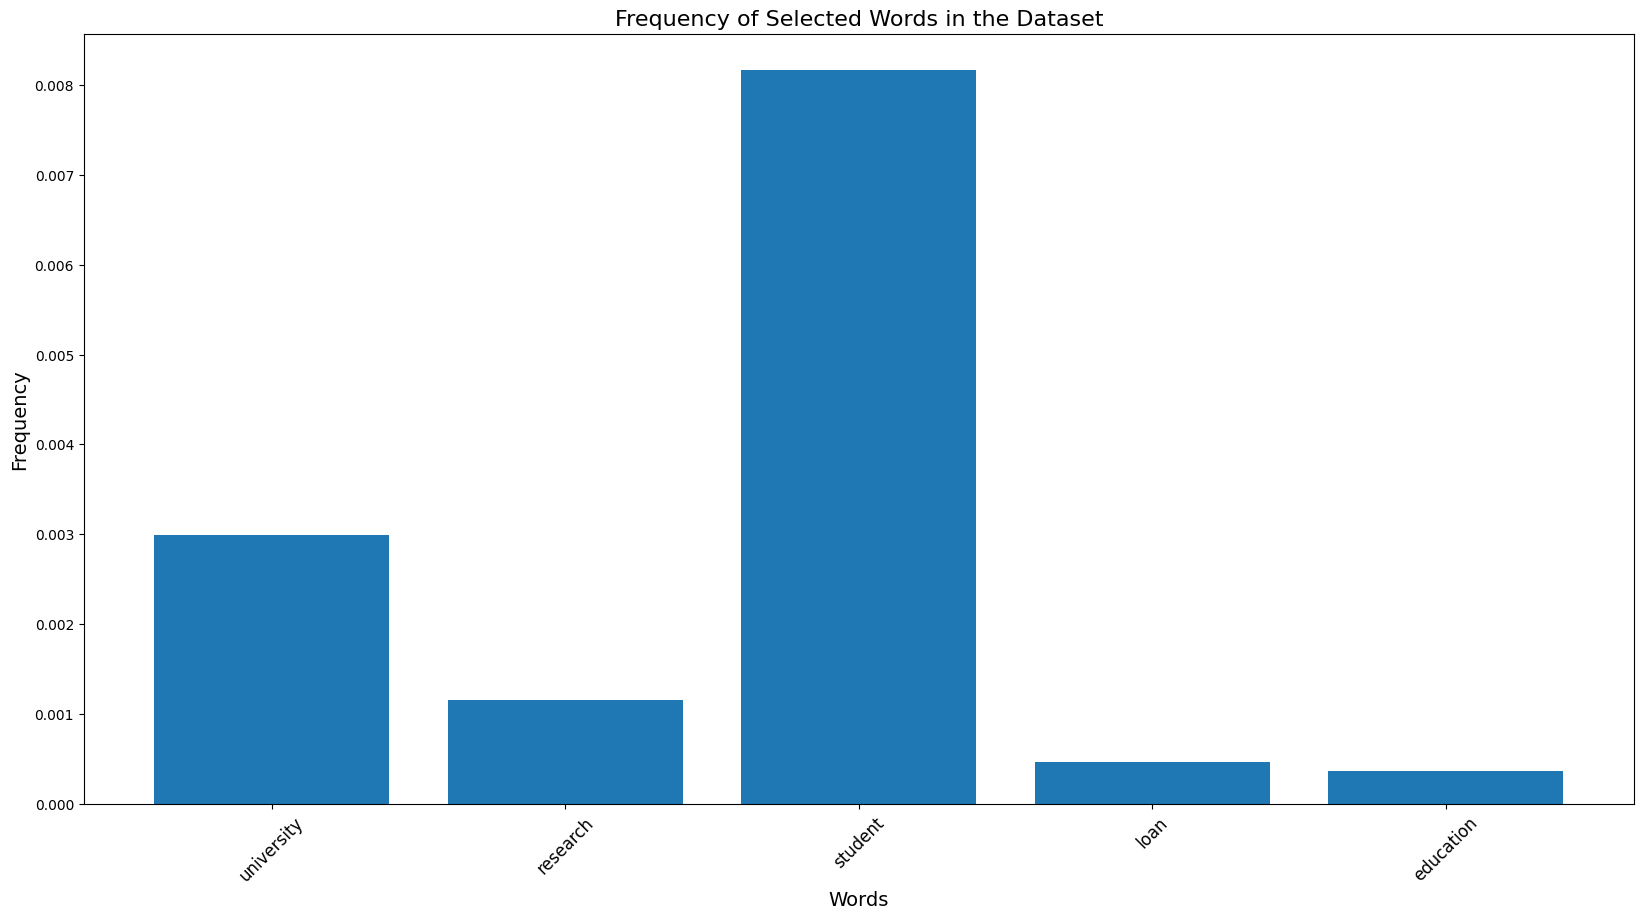

In [26]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 
# Words are from the dataset "university", "research", "student", "loan", "education"
plot_list = word_counts[["university", "research", "student", "loan", "education"]]

# Plot their frequency in the dataset
plt.figure(figsize=(20, 10))
plt.bar(plot_list.index, plot_list.values)
plt.title("Frequency of Selected Words in the Dataset", fontsize=16)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [27]:
uiuc=pd.read_csv("uiuc.csv")
uiuc

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1
...,...,...,...,...,...,...
4720,4720,2024-08-21 20:28:40,1,Im interested if you're still looking,Accomplished_Fix2409,0
4721,4721,2024-08-21 20:26:15,7,I went to one of the taylor nights. was quite ...,student176895,4
4722,4722,2024-08-21 20:21:54,10,"Hey, I’m so sorry to hear that’s happening. If...",OCCLUIUC,5
4723,4723,2024-08-21 20:21:54,10,"AFAIK, the “cleaning company” that UGroup empl...",perpetuallytired29,3


In [28]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
uiuc['cleaned_text'] = uiuc['text'].apply(clean)
#we can see the first comment after cleaning vs before
uiuc["cleaned_text"][0]
uiuc["text"][0]

'Have the same professor! And in lecture he did say we were gonna have to learn some of the stuff ourself\xa0\r\n\r\nI would recommend using online resources such as Paul’s Online Math Notes and Professor Leonard on YouTube. Personally, I’ve been learning the material from those sources before going to lecture'

In [29]:
#create a bag of words representation with count vectorizer
vectorizer_uiuc = CountVectorizer()
bag_of_words_uiuc = vectorizer_uiuc.fit_transform(uiuc['cleaned_text'])

In [30]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words_uiuc

<4725x10109 sparse matrix of type '<class 'numpy.int64'>'
	with 98566 stored elements in Compressed Sparse Row format>

In [31]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df_uiuc = pd.DataFrame(bag_of_words_uiuc.toarray(), columns=vectorizer_uiuc.get_feature_names_out())
bow_df_uiuc

,aa,aaa,aaaaah,aaabb,ab,abandoned,abcc,abide,abilities,ability,...,zombie,zone,zones,zoo,zoom,zoomed,봉사를,세계로,숭실,진리와
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts_uiuc = bow_df_uiuc.sum()
#we can sort the values to see the most common words
word_counts_uiuc = word_counts_uiuc.sort_values(ascending=False)
#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts_uiuc

the                                                                                                       4613
to                                                                                                        3629
and                                                                                                       2973
you                                                                                                       2551
of                                                                                                        1854
                                                                                                          ... 
httpswwwwciacomnewsraresquirrelmemorializedonuoficampus                                                      1
httpswwwurbanaillinoisussitesdefaultfilesattachmentslandlordtenantpdf                                        1
httpswwwuoficreditunionorgcreditcreditcardshttpswwwuoficreditunionorgcreditcreditcards                       1
h

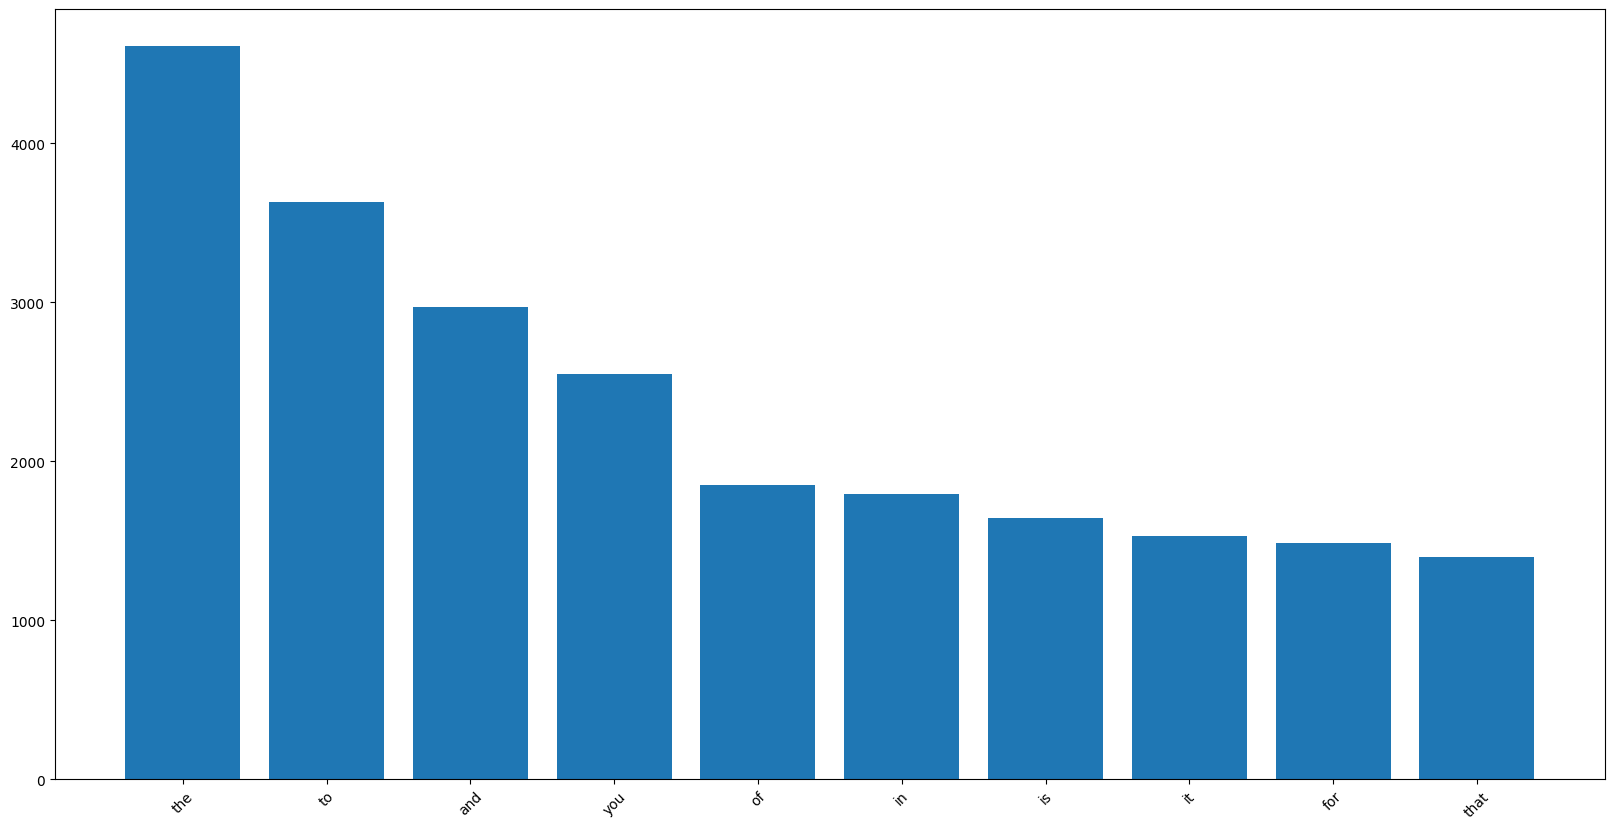

In [33]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts_uiuc = word_counts_uiuc.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts_uiuc.index, word_counts_uiuc.values)
plt.xticks(rotation=45)
plt.show()

In [34]:
#we can further process the text by removing stopwords and lemmatizing
uiuc['lemmatized_text'] = uiuc['cleaned_text'].apply(lemmatize)

In [35]:
vectorizer_uiuc = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words_uiuc = vectorizer_uiuc.fit_transform(uiuc['lemmatized_text'])

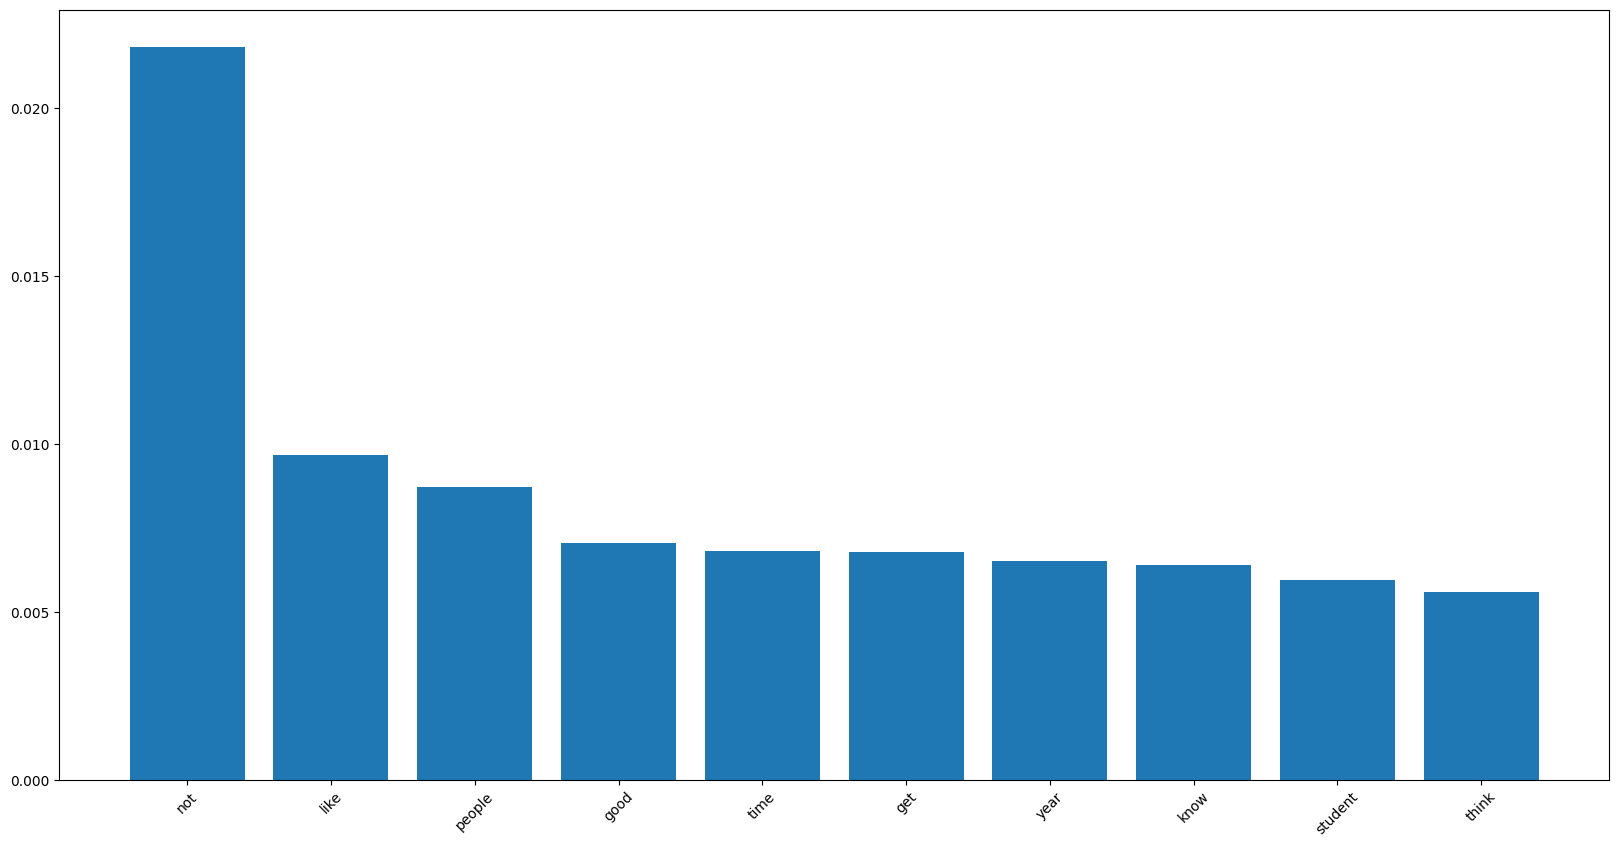

In [36]:
bag_of_words_uiuc
#we can repeat the previous code to create a dataframe and count the words
bow_df_uiuc = pd.DataFrame(bag_of_words_uiuc.toarray(), columns=vectorizer_uiuc.get_feature_names_out())
word_counts_uiuc = bow_df_uiuc.sum()
word_counts_uiuc = word_counts_uiuc.sort_values(ascending=False)
word_counts_uiuc
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts_uiuc = word_counts_uiuc / word_counts_uiuc.sum()
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts_uiuc.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

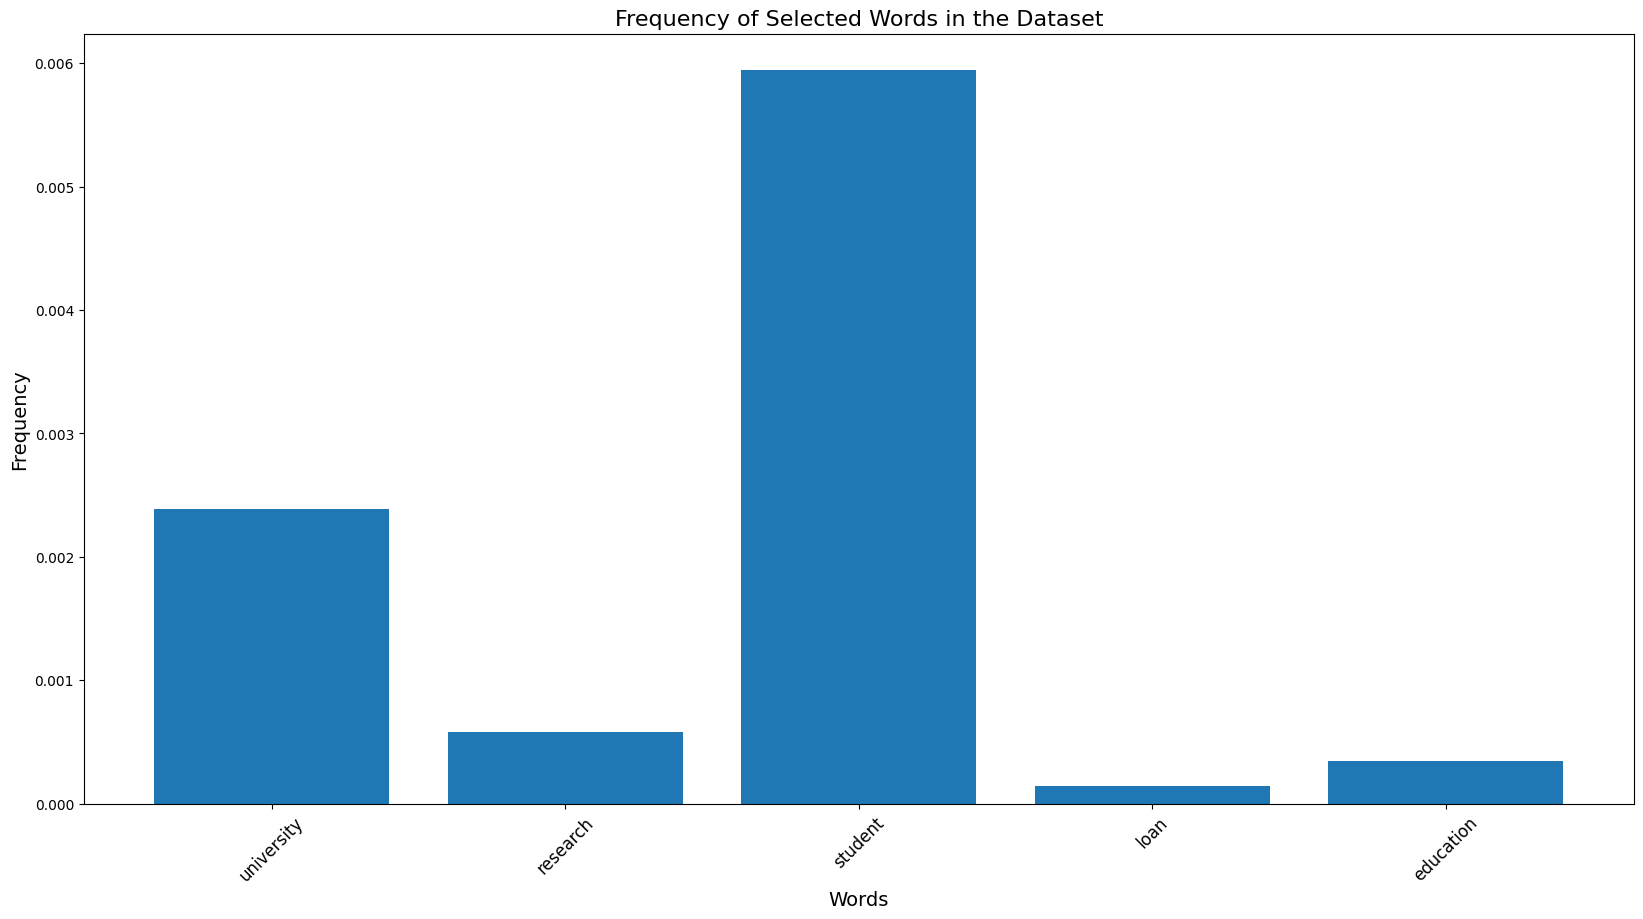

In [37]:
plot_list = word_counts_uiuc[["university", "research", "student", "loan", "education"]]

# Plot their frequency in the dataset
plt.figure(figsize=(20, 10))
plt.bar(plot_list.index, plot_list.values)
plt.title("Frequency of Selected Words in the Dataset", fontsize=16)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [38]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [39]:
#clean and lemmatize the data csv
#pandas allows us to quickly apply this cleaning function to all rows in a column
data['cleaned_text'] = data['text'].apply(clean)
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)

In [40]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
X = vectorizer.fit_transform(data['lemmatized_text'])  # Feature matrix
y = data['label']  # Target variable


In [41]:
#train a logistic regression model using the bag of words features as X and the label column as y
# Split data into training and testing sets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [42]:
#report the accuracy of the model
# Calculate accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

# Output accuracy
accuracy

0.7121693121693121

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [43]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 
# Step 1: Split the dataset (hold out 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a Logistic Regression model using only X_train and y_train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 3: Evaluate the model on unseen data (X_test)
y_pred = model.predict(X_test)

# Step 4: Calculate accuracy
new_accuracy = accuracy_score(y_test, y_pred)
new_accuracy

0.7121693121693121

#### Part 3: Examine the top features of your model using the following code

In [44]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?
# Get feature names from CountVectorizer
feature_names = np.array(vectorizer.get_feature_names_out())

In [45]:
coefficients = pd.DataFrame({'feature': feature_names, 'coefficient': model.coef_.flatten()})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_positive

,feature,coefficient
7569,uiuc,2.525421
6124,rso,2.210487
7679,urbana,1.978933
3291,illinois,1.928740
3689,las,1.840540
2849,grainger,1.748078
3288,illini,1.692617
1504,danville,1.600932
927,champaign,1.555713
7437,tow,1.549635


In [46]:
top_10_negative = coefficients.tail(10)
top_10_negative

,feature,coefficient
1455,csg,-1.699535
6110,ross,-1.740134
2486,fresno,-1.748672
7576,um,-1.749679
7810,vote,-1.785512
4257,mcard,-1.852693
1678,diag,-2.048499
1936,eec,-2.129292
7580,umich,-2.149092
4341,michigan,-3.026345


In [47]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?

The words identified by the model make sense in differentiating UIUC from Michigan. UIUC-related words include references to the university name ("uiuc," "illinois"), campus locations ("urbana," "grainger"), and student organizations ("rso," "illini"). Similarly, Michigan-related words include university-specific identifiers ("umich," "michigan," "uofm"), campus landmarks ("diag"), and school spirit terms ("wolverine"). These distinctions indicate that the logistic regression model has successfully learned relevant vocabulary to separate the two universities' subreddit discussions.

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [48]:
import pip


%pip install gensim

In [49]:
#train a lda topic model with gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

#convert bow X into a gensim corpus
corpus = Sparse2Corpus(X, documents_columns=False)

# Step 3: Create a dictionary from the vectorizer's vocabulary
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [50]:
corpus

In [51]:
#train the lda model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=20)

#show the topics
lda_model.print_topics()

[(0,
  '0.078*"class" + 0.029*"semester" + 0.028*"take" + 0.023*"not" + 0.023*"math" + 0.019*"week" + 0.015*"course" + 0.013*"lecture" + 0.011*"start" + 0.010*"work"'),
 (1,
  '0.033*"sell" + 0.019*"texas" + 0.017*"like" + 0.014*"ticket" + 0.012*"student" + 0.011*"look" + 0.010*"geo" + 0.010*"math" + 0.010*"not" + 0.009*"offer"'),
 (2,
  '0.027*"not" + 0.016*"try" + 0.009*"take" + 0.009*"think" + 0.009*"building" + 0.009*"year" + 0.009*"say" + 0.008*"helpful" + 0.008*"get" + 0.008*"hate"'),
 (3,
  '0.038*"not" + 0.019*"student" + 0.013*"say" + 0.012*"want" + 0.010*"pass" + 0.009*"law" + 0.009*"university" + 0.009*"fact" + 0.008*"death" + 0.007*"go"'),
 (4,
  '0.032*"good" + 0.024*"parking" + 0.020*"winter" + 0.019*"bus" + 0.015*"park" + 0.013*"campus" + 0.012*"bike" + 0.012*"day" + 0.010*"think" + 0.009*"lot"'),
 (5,
  '0.027*"not" + 0.012*"fall" + 0.010*"worth" + 0.010*"time" + 0.010*"apply" + 0.009*"power" + 0.009*"professor" + 0.009*"advisor" + 0.009*"specific" + 0.009*"get"'),
 (6,

In [53]:
#evaluate topic distribution of a review from the bag of words
#print long string without having to scroll
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=data['lemmatized_text'][30]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

pmd


In [ ]:
#check the topic distribution of a single review
lda_model.get_document_topics(corpus[30])

In [54]:
models=lda_model.get_document_topics(corpus, minimum_probability=0)

rows=[]
for i in range(len(models)):
    row=[]
    for m in models[i]:
        row.append(m[1])
    rows.append(row)

topic_df=pd.DataFrame(rows)

topic_df.sort_values(3, ascending=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1552,0.001163,0.001163,0.001163,0.977894,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163,0.001163
1538,0.000634,0.000634,0.000634,0.972912,0.015670,0.000634,0.000634,0.000634,0.000634,0.000634,0.000634,0.000634,0.000634,0.000634,0.000634,0.000634,0.000634,0.000634,0.000634,0.000634
496,0.002942,0.002942,0.002942,0.944103,0.002942,0.002942,0.002942,0.002942,0.002942,0.002942,0.002942,0.002942,0.002942,0.002942,0.002942,0.002942,0.002942,0.002942,0.002942,0.002942
987,0.003127,0.003127,0.003127,0.940593,0.003127,0.003127,0.003127,0.003127,0.003127,0.003127,0.003127,0.003127,0.003127,0.003127,0.003127,0.003127,0.003127,0.003127,0.003127,0.003127
1191,0.003130,0.003130,0.003130,0.940535,0.003130,0.003130,0.003130,0.003130,0.003130,0.003130,0.003130,0.003130,0.003130,0.003130,0.003130,0.003130,0.003130,0.003130,0.003130,0.003130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,0.026121,0.056002,0.077757,0.000325,0.030343,0.000325,0.029578,0.354251,0.000325,0.017654,0.040689,0.014846,0.000325,0.011580,0.163427,0.092952,0.051064,0.000325,0.000325,0.031788
5169,0.133557,0.055770,0.113992,0.000311,0.000311,0.025940,0.000311,0.097577,0.000311,0.000311,0.032427,0.038005,0.014098,0.076512,0.144157,0.051241,0.109370,0.105181,0.000311,0.000311
8903,0.000262,0.029064,0.011582,0.000262,0.007794,0.000262,0.011885,0.361999,0.017756,0.000262,0.040187,0.074329,0.021283,0.000262,0.184815,0.103954,0.000262,0.050157,0.074329,0.009295
7355,0.097643,0.000262,0.081988,0.000262,0.000262,0.000262,0.043777,0.170244,0.000262,0.031155,0.173872,0.000262,0.000262,0.058405,0.133505,0.000262,0.000262,0.057721,0.000262,0.149071


In [67]:
#evaluate topic distribution of a review from the bag of words
#print long string without having to scroll
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=data['lemmatized_text'][7017]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

pro tip family asset hurt financial aid transfer asset llc financial aid
consider business income business asset business certain number employee year
refile
